Interacting with Web APIs 
Problem Statement: Analyzing Weather Data from OpenWeatherMap API 
Dataset: Weather data retrieved from OpenWeatherMap API 
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data 
for a specific location and perform data modeling and visualization toanalyze weather 
patterns over time. 
Tasks to Perform: 
1. Register and obtain API key from OpenWeatherMap. 
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for 
a specific location. 
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and 
precipitation from the API response. 
4. Clean and preprocess the retrieved data, handling missing values or inconsistent 
formats. 
5. Perform data modeling to analyze weather patterns, such as calculating average 
temperature, maximum/minimum values, or trends over time. 
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or 
scatter plots, to represent temperature changes, precipitation levels, or wind speed 
variations. 
7. Apply data aggregation techniques to summarize weather statistics by specific time 
periods (e.g., daily, monthly, seasonal). 
8. Incorporate geographical information, if available, to create maps or geospatial 
visualizations representing weather patterns across different locations. 
9. Explore and visualize relationships between weather attributes, such as temperature 
and humidity, using correlation plots or heatmaps. 

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display
from folium import Map, Marker
from folium.plugins import HeatMap
from datetime import datetime


1. Register and obtain API key from OpenWeatherMap. 

In [2]:
# Step 1: Define API key and list of cities
api_key = 'b7e6906ae46d00d1ec3d4cefd80b2f76'
cities = ["Pune", "Delhi", "Mumbai", "Sydney"]

3. Extract relevant weather attributes such as temperature, humidity, wind speed, and 
precipitation from the API response. 

In [3]:

# Initialize an empty list to store data for each city
weather_data_list = []

# Step 3: Loop through each city to fetch and process data
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
    response = requests.get(url)
    data = response.json()
    
    # Check if data retrieval was successful
    if response.status_code == 200 and 'main' in data:
        date_time = datetime.utcfromtimestamp(data['dt']).strftime('%Y-%m-%d %H:%M:%S')
# Structure data for the city, including weather description and precipitation
        city_weather_data = {
            'City': data['name'],
            'Temperature (K)': data['main']['temp'],  # Temperature in Kelvin
            'Humidity (%)': data['main']['humidity'],  # Humidity in percentage
            'Wind Speed (m/s)': data['wind']['speed'],  # Wind speed in m/s
            'Weather Description': data['weather'][0]['description'],  # Weather condition
            'Precipitation (mm)': data.get('rain', {}).get('1h', 0),  # Precipitation in mm (last hour)
            'Latitude': data['coord']['lat'],  # Latitude of the city
            'Longitude': data['coord']['lon'],  # Longitude of the city
            'Date Time': date_time  # Add date_time to the data structure
        }
        
        if 'pressure' in data['main']:
            city_weather_data['Pressure (hPa)'] = data['main']['pressure']  # Atmospheric pressure
        
        # Append the structured data to the list
        weather_data_list.append(city_weather_data)
    else:
        print(f"Could not retrieve data for {city}. Response: {data}")
# Convert the list of dictionaries to a DataFrame
weather_df = pd.DataFrame(weather_data_list)
# Convert temperature from Kelvin to Celsius (if you haven't done this yet)
if 'Temperature (K)' in weather_df.columns:
    weather_df['Temperature (°C)'] = weather_df['Temperature (K)'] - 273.15



# Display the DataFrame
weather_df.head()



C:\Users\admin\AppData\Local\Temp\ipykernel_21784\1152322703.py:12: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date_time = datetime.utcfromtimestamp(data['dt']).strftime('%Y-%m-%d %H:%M:%S')


,City,Temperature (K),Humidity (%),Wind Speed (m/s),Weather Description,Precipitation (mm),Latitude,Longitude,Date Time,Pressure (hPa),Temperature (°C)
0,Pune,298.64,47,0.64,scattered clouds,0,18.5196,73.8553,2024-11-04 15:52:22,1013,25.49
1,Delhi,297.20,64,0.00,haze,0,28.6667,77.2167,2024-11-04 15:50:58,1013,24.05
2,Mumbai,303.14,58,3.09,haze,0,19.0144,72.8479,2024-11-04 15:48:10,1012,29.99
3,Sydney,291.17,81,5.14,overcast clouds,0,-33.8679,151.2073,2024-11-04 15:47:27,1016,18.02


4. Clean and preprocess the retrieved data, handling missing values or inconsistent 
formats.

In [4]:
# Display the count of missing values in each column
missing_values = weather_df.isnull().sum()
print("Missing Values Count:\n", missing_values)

# Display the summary of the DataFrame
print("\nDataFrame Info:")
weather_df.info()


Missing Values Count:
 City                   0
Temperature (K)        0
Humidity (%)           0
Wind Speed (m/s)       0
Weather Description    0
Precipitation (mm)     0
Latitude               0
Longitude              0
Date Time              0
Pressure (hPa)         0
Temperature (°C)       0
dtype: int64

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 4 non-null      object 
 1   Temperature (K)      4 non-null      float64
 2   Humidity (%)         4 non-null      int64  
 3   Wind Speed (m/s)     4 non-null      float64
 4   Weather Description  4 non-null      object 
 5   Precipitation (mm)   4 non-null      int64  
 6   Latitude             4 non-null      float64
 7   Longitude            4 non-null      float64
 8   Date Time            4 non-null      object 
 9   Pressure (hPa)  

In [5]:
# Clean and preprocess the retrieved data
weather_df.fillna({
    'Temperature (K)': np.nan,  # Temperature can remain NaN if missing
    'Humidity (%)': weather_df['Humidity (%)'].median() if 'Humidity (%)' in weather_df else np.nan,
    'Wind Speed (m/s)': weather_df['Wind Speed (m/s)'].median() if 'Wind Speed (m/s)' in weather_df else np.nan,
    'Precipitation (mm)': 0,  # Replace NaN with 0 for precipitation
    'Pressure (hPa)': weather_df['Pressure (hPa)'].median() if 'Pressure (hPa)' in weather_df.columns else np.nan
}, inplace=True)

if 'Temperature (K)' in weather_df.columns:
    weather_df['Temperature (°C)'] = weather_df['Temperature (K)'] - 273.15
# Display the cleaned DataFrame
print("Cleaned Weather Data:")
print(weather_df.head())

Cleaned Weather Data:
     City  Temperature (K)  Humidity (%)  Wind Speed (m/s)  \
0    Pune           298.64            47              0.64   
1   Delhi           297.20            64              0.00   
2  Mumbai           303.14            58              3.09   
3  Sydney           291.17            81              5.14   

  Weather Description  Precipitation (mm)  Latitude  Longitude  \
0    scattered clouds                   0   18.5196    73.8553   
1                haze                   0   28.6667    77.2167   
2                haze                   0   19.0144    72.8479   
3     overcast clouds                   0  -33.8679   151.2073   

             Date Time  Pressure (hPa)  Temperature (°C)  
0  2024-11-04 15:52:22            1013             25.49  
1  2024-11-04 15:50:58            1013             24.05  
2  2024-11-04 15:48:10            1012             29.99  
3  2024-11-04 15:47:27            1016             18.02  


5. Perform data modeling to analyze weather patterns, such as calculating average 
temperature, maximum/minimum values, or trends over time. 

In [6]:
# Handle missing values in numeric columns only
numeric_cols = weather_df.select_dtypes(include='number').columns
weather_df[numeric_cols] = weather_df[numeric_cols].fillna(weather_df[numeric_cols].median())
# Display the DataFrame to check missing values are handled
print(weather_df.head())


     City  Temperature (K)  Humidity (%)  Wind Speed (m/s)  \
0    Pune           298.64            47              0.64   
1   Delhi           297.20            64              0.00   
2  Mumbai           303.14            58              3.09   
3  Sydney           291.17            81              5.14   

  Weather Description  Precipitation (mm)  Latitude  Longitude  \
0    scattered clouds                   0   18.5196    73.8553   
1                haze                   0   28.6667    77.2167   
2                haze                   0   19.0144    72.8479   
3     overcast clouds                   0  -33.8679   151.2073   

             Date Time  Pressure (hPa)  Temperature (°C)  
0  2024-11-04 15:52:22            1013             25.49  
1  2024-11-04 15:50:58            1013             24.05  
2  2024-11-04 15:48:10            1012             29.99  
3  2024-11-04 15:47:27            1016             18.02  


In [7]:
#  Check if data exists and aggregate by city
if 'Temperature (K)' in weather_df.columns:
        weather_df['Temperature (°C)'] = weather_df['Temperature (K)'] - 273.15
if not weather_df.empty:
    aggregation_dict = {
        'Temperature (°C)': ['mean', 'max', 'min'],
        'Humidity (%)': 'mean',
        'Wind Speed (m/s)': 'mean'
    }
    if 'Pressure (hPa)' in weather_df.columns:
        aggregation_dict['Pressure (hPa)'] = 'mean'
    
    
    # Group by 'City' and calculate summary statistics
    summary_stats = weather_df.groupby('City').agg(aggregation_dict)
    print("Summary Statistics:")
    print(summary_stats)
else:
    print("No data available for aggregation.")

Summary Statistics:
       Temperature (°C)               Humidity (%) Wind Speed (m/s)  \
                   mean    max    min         mean             mean   
City                                                                  
Delhi             24.05  24.05  24.05         64.0             0.00   
Mumbai            29.99  29.99  29.99         58.0             3.09   
Pune              25.49  25.49  25.49         47.0             0.64   
Sydney            18.02  18.02  18.02         81.0             5.14   

       Pressure (hPa)  
                 mean  
City                   
Delhi          1013.0  
Mumbai         1012.0  
Pune           1013.0  
Sydney         1016.0  


6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or 
scatter plots, to represent temperature changes, precipitation levels, or wind speed 
variations.

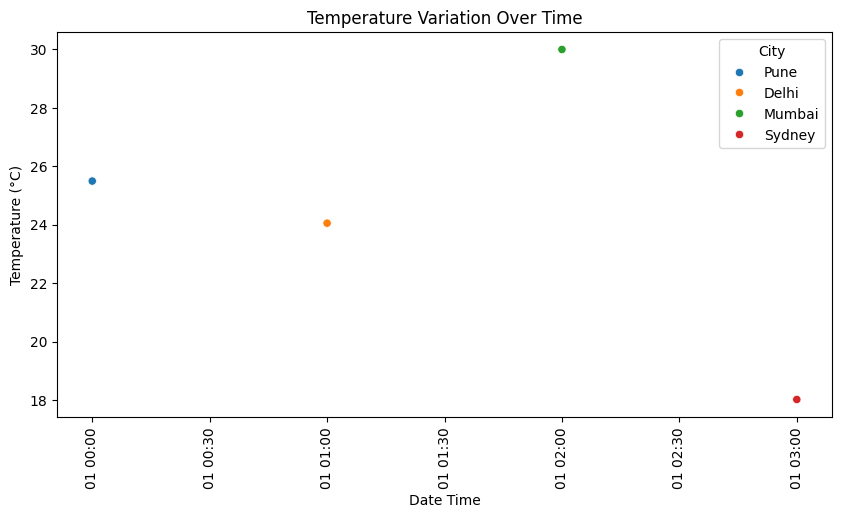

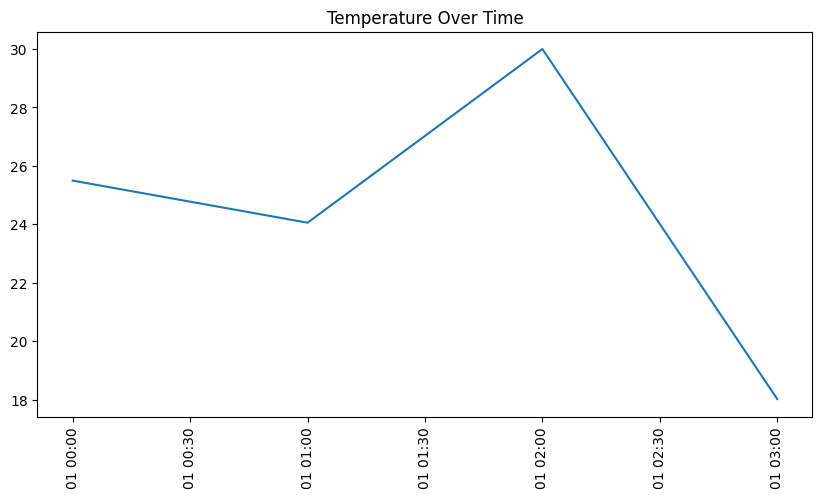

In [8]:
# Step 8: Visualization - Scatterplot of Temperature over Time (example data setup)
# Create a sample Date Time column for demonstration purposes
weather_df['Date Time'] = pd.date_range(start="2024-01-01", periods=len(weather_df), freq='h')
plt.figure(figsize=(10, 5))
sns.scatterplot(x=weather_df['Date Time'], y=weather_df['Temperature (°C)'], hue=weather_df['City'])
plt.xticks(rotation=90)
plt.title("Temperature Variation Over Time")
plt.show()

# Plot Temperature over Time as a Line Plot
plt.figure(figsize=(10, 5))
plt.plot(weather_df['Date Time'], weather_df['Temperature (°C)'])
plt.xticks(rotation=90)
plt.title("Temperature Over Time")
plt.show()

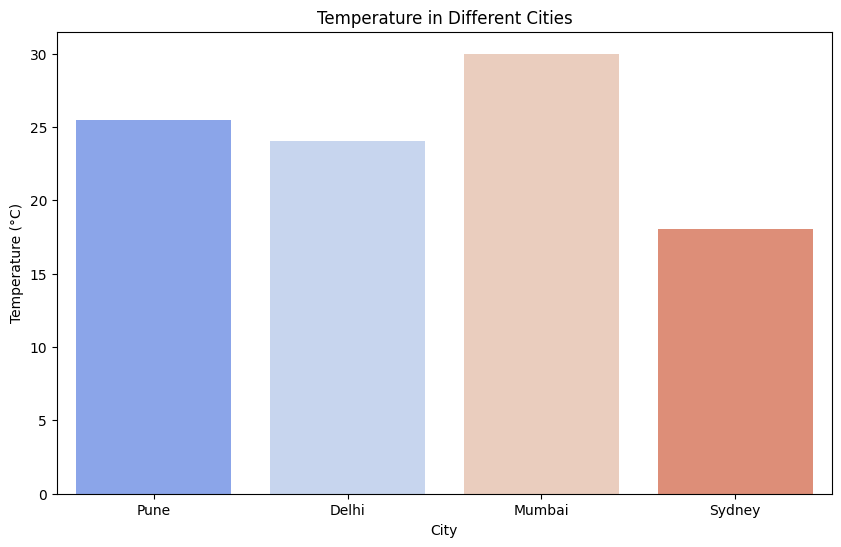

In [9]:
# Step 9: Visualize the Weather Data for all cities
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Temperature (°C)', data=weather_df, palette='coolwarm', hue='City', legend=False)
plt.title('Temperature in Different Cities')
plt.show()

7. Apply data aggregation techniques to summarize weather statistics by specific time 
periods (e.g., daily, monthly, seasonal).

In [10]:

#daily
# Ensure 'Date Time' is in datetime format (this was done previously)
weather_df['Date Time'] = pd.to_datetime(weather_df['Date Time'], errors='coerce')

# Create a 'Date' column from 'Date Time'
weather_df['Date'] = weather_df['Date Time'].dt.date

# Group by 'Date' and aggregate mean for 'Temperature' and 'Wind Speed'
daily_agg = weather_df.groupby('Date').agg({
    'Temperature (°C)': 'mean',
    'Wind Speed (m/s)': 'mean'
}).reset_index()

# Display the aggregated daily data
print(daily_agg)


         Date  Temperature (°C)  Wind Speed (m/s)
0  2024-01-01           24.3875            2.2175


In [11]:
#monthly
# Create a 'Month' column from 'Date Time'
weather_df['Month'] = weather_df['Date Time'].dt.to_period('M')

# Group by 'Month' and aggregate mean for 'Temperature (°C)' and 'Wind Speed (m/s)'
monthly_agg = weather_df.groupby('Month').agg({
    'Temperature (°C)': 'mean',
    'Wind Speed (m/s)': 'mean'
}).reset_index()

# Display the aggregated monthly data
print(monthly_agg)


     Month  Temperature (°C)  Wind Speed (m/s)
0  2024-01           24.3875            2.2175


In [16]:
#yearly
# Create a 'Year' column from 'Date Time'
weather_df['Year'] = weather_df['Date Time'].dt.to_period('Y')

# Group by 'Year' and aggregate mean for 'Temperature (°C)' and 'Wind Speed (m/s)'
yearly_agg = weather_df.groupby('Year').agg({
    'Temperature (°C)': 'mean',
    'Wind Speed (m/s)': 'mean'
}).reset_index()

# Display the aggregated yearly data
print(yearly_agg)


   Year  Temperature (°C)  Wind Speed (m/s)
0  2024           24.3875            2.2175


In [17]:
# Assuming df_weather is your DataFrame containing the provided columns

# Daily Aggregation by City
daily_agg_city = weather_df.groupby(['City', 'Date Time']).agg({
    'Temperature (°C)': ['mean', 'max', 'min'],
    'Wind Speed (m/s)': ['mean', 'max', 'min']
}).reset_index()

# Display the aggregated daily data by city
print("Daily Aggregated Data by City:")
print(daily_agg_city)

# Monthly Aggregation by City
monthly_agg_city = weather_df.groupby(['City', 'Month']).agg({
    'Temperature (°C)': ['mean', 'max', 'min'],
    'Wind Speed (m/s)': ['mean', 'max', 'min']
}).reset_index()

# Display the aggregated monthly data by city
print("Monthly Aggregated Data by City:")
print(monthly_agg_city)

# Yearly Aggregation by City
yearly_agg_city = weather_df.groupby(['City', 'Year']).agg({
    'Temperature (°C)': ['mean', 'max', 'min'],
    'Wind Speed (m/s)': ['mean', 'max', 'min']
}).reset_index()

# Display the aggregated yearly data by city
print("Yearly Aggregated Data by City:")
print(yearly_agg_city)


Daily Aggregated Data by City:
     City           Date Time Temperature (°C)               Wind Speed (m/s)  \
                                          mean    max    min             mean   
0   Delhi 2024-01-01 01:00:00            24.05  24.05  24.05             0.00   
1  Mumbai 2024-01-01 02:00:00            29.99  29.99  29.99             3.09   
2    Pune 2024-01-01 00:00:00            25.49  25.49  25.49             0.64   
3  Sydney 2024-01-01 03:00:00            18.02  18.02  18.02             5.14   

               
    max   min  
0  0.00  0.00  
1  3.09  3.09  
2  0.64  0.64  
3  5.14  5.14  
Monthly Aggregated Data by City:
     City    Month Temperature (°C)               Wind Speed (m/s)            
                               mean    max    min             mean   max   min
0   Delhi  2024-01            24.05  24.05  24.05             0.00  0.00  0.00
1  Mumbai  2024-01            29.99  29.99  29.99             3.09  3.09  3.09
2    Pune  2024-01            25.49  

8. Incorporate geographical information, if available, to create maps or geospatial 
visualizations representing weather patterns across different locations. 

In [18]:
# Step 10: Map Visualization of Weather Data
map_weather = folium.Map(location=[0, 0], zoom_start=2)  # Center the map globally

# Add markers for each city with weather info
for _, row in weather_df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=(
            f"{row['City']}<br>"
            f"Temperature: {row['Temperature (°C)']:.2f} °C<br>"
            f"Humidity: {row['Humidity (%)']}%<br>"
            f"Wind Speed: {row['Wind Speed (m/s)']} m/s"
        )
    ).add_to(map_weather)

# Display map in Jupyter Notebook
map_weather

9. Explore and visualize relationships between weather attributes, such as temperature 
and humidity, using correlation plots or heatmaps. 

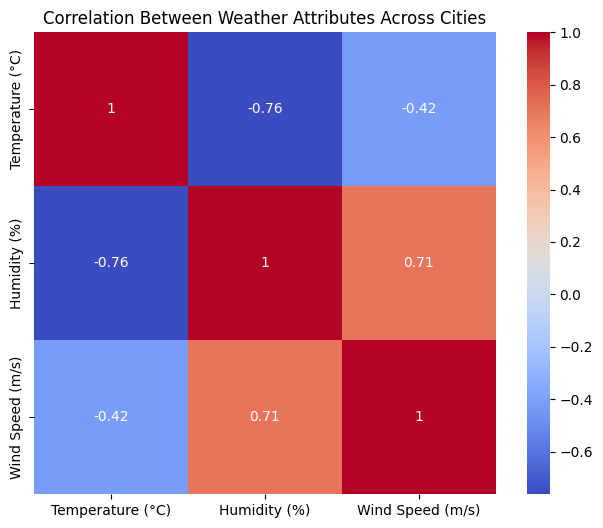

In [19]:
# Step 11: Correlation Heatmap of Weather Attributes
plt.figure(figsize=(8, 6))
sns.heatmap(weather_df[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)']].corr(), 
            annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Between Weather Attributes Across Cities")
plt.show()